# Biodiversity in National Parks

## Introduction
For this project, we will analyze data from the National Parks Service to understand the conservation statuses of species in different national parks. Our goal is to identify patterns and themes in the types of species that become endangered and provide meaningful insights that could aid in conservation efforts.

### Objectives:
The main objectives of this project are:
1. To analyze the conservation statuses of species in various national parks.
2. To identify patterns or themes in the types of species that are endangered.
3. To investigate the relationship between conservation status and species sightings.
4. To provide recommendations based on the findings to aid in conservation efforts.

### Datasets Description:
This project uses two datasets provided by Codecademy.com.
1. Species_info.csv includes information on 5824 animal species. The columns in the dataset are category, scientific name, common name, and conservation status. 
2. Observations.csv includes information on the observations of 23296 animal species within park locations. The columns in the dataset are  scientific name, park name, and the number of observations. 

### Methodology:
We will begin explore descriptive statistics and data visualization techniques to understand the data better. We will also use statistical inference to test if observed values are statistically significant. 
1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 
 
### Expected Outcomes:






## Importing Python Modules & Loading Data

First, we will import the relevant Python modules to help us with our analysis. 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

Next, we will load in the data sets we will be using for this project. 

In [3]:
species_info = pd.read_csv("/Users/tanishakhabe/Desktop/biodiversity_starter/species_info.csv")
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [4]:
species_info.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


We can see that there are many null values in the conservation_status column which we will have to clean. 

In [5]:
observations = pd.read_csv("/Users/tanishakhabe/Desktop/biodiversity_starter/observations.csv")
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [6]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


## Data Cleaning

In [7]:
## Cleaning the conservation_status column in species_info. 

species_info.fillna('No Intervention', inplace=True)
species_info.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

## Exploratory Data Analysis (EDA)

* What is the distribution of conservation_status for animals?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which species were spotted the most at each park?


In [8]:
species_info.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,5824
unique,7,5541,5504,5
top,Vascular Plant,Hypochaeris radicata,Brachythecium Moss,No Intervention
freq,4470,3,7,5633


<function matplotlib.pyplot.show(close=None, block=None)>

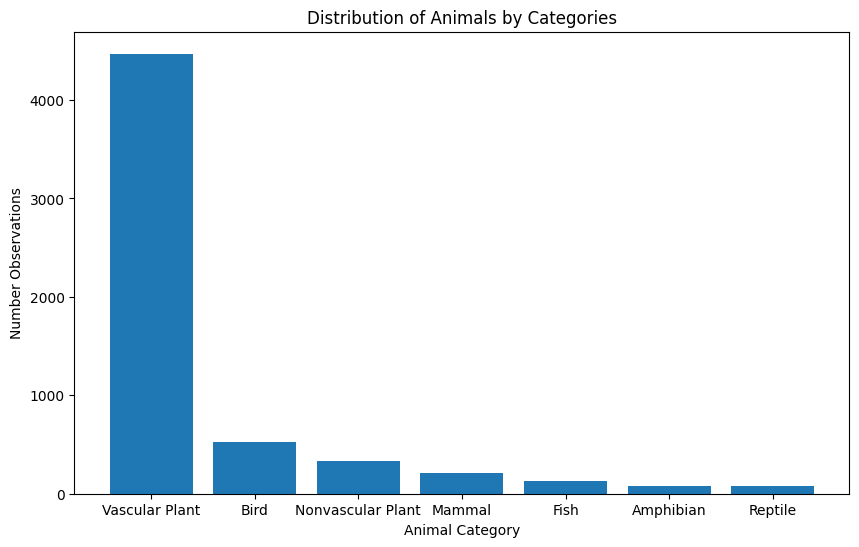

In [9]:
# Creating a bar plot of the distribution of animals in each category.
category_counts = species_info["category"].value_counts()
category_names = category_counts.index

positions = range(len(category_counts))
plt.figure(figsize=(10, 6))
plt.bar(positions, category_counts)
plt.xticks(positions, category_names)
plt.xlabel("Animal Category")
plt.ylabel("Number Observations")
plt.title("Distribution of Animals by Categories")

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

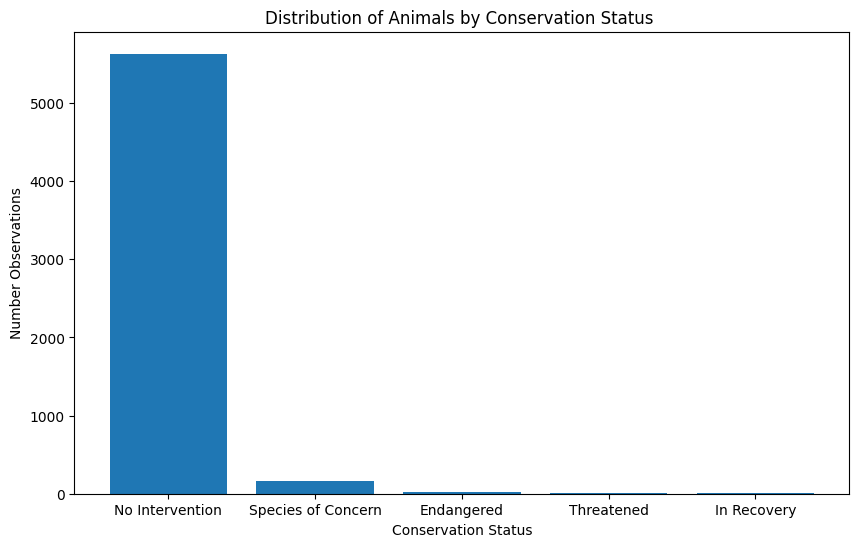

In [10]:
# Creating a bar plot of the distribution of animals by conservation status.
status_counts = species_info["conservation_status"].value_counts()
status_names = status_counts.index

positions = range(len(status_counts))
plt.figure(figsize=(10, 6))
plt.bar(positions, status_counts)
plt.xticks(positions, status_names)
plt.xlabel("Conservation Status")
plt.ylabel("Number Observations")
plt.title("Distribution of Animals by Conservation Status ")

plt.show

What is the distribution of conservation_status for animals?

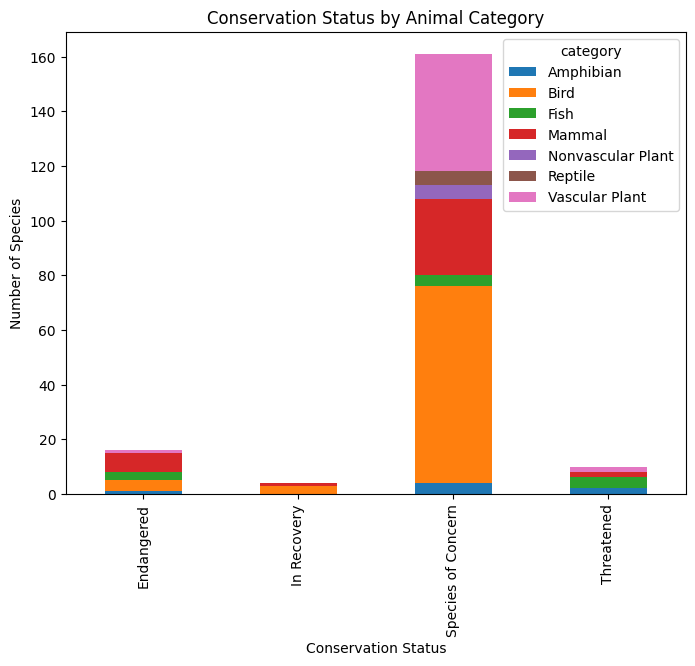

In [11]:
# Creating a table and a new bar plot to examine the relationship between animal category and conservation status. 

conservationCategory = species_info[species_info.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory



graph = conservationCategory.plot(kind = 'bar', figsize=(8,6), stacked=True)
plt.title("Conservation Status by Animal Category")
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species");
plt.show()

Are certain types of species more likely to be endangered?

In [12]:
# Creating a new column to account for all species under conservation_status except those with "No Intervention" status. 
species_info["protected_species"] = species_info["conservation_status"] != "No Intervention"

In [ ]:
# Creating a table and new graph to visualize the breakdown of each animal category by protection status. 
